In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
df = pd.read_csv('clientes_compras_reg.csv')
df.head()

,idade,renda,tempo_site,numero_visitas,avaliacao_produto,historico_compras,valor_compra
0,56,8882,42,5,1,5,583.865336
1,69,3906,56,19,3,8,920.850989
2,46,5086,36,11,2,1,457.502788
3,32,15503,20,12,2,2,591.761877
4,60,10152,4,10,3,9,770.229810


In [2]:

# Separando features e target
X = df.drop('valor_compra', axis=1)
y = df['valor_compra']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o Random Forest para regressão
rf_reg = RandomForestRegressor(
    n_estimators=100,    # número de árvores
    max_depth=10,        # profundidade máxima de cada árvore
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1           # usa todos os cores disponíveis
)

# Treinando o modelo
rf_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred = rf_reg.predict(X_test)

# Avaliando o modelo
print("\nMétricas de Avaliação:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Erro Médio Absoluto: R${mean_absolute_error(y_test, y_pred):.2f}")
print(f"Erro Quadrático Médio: R${mean_squared_error(y_test, y_pred):.2f}")
print(f"Raiz do Erro Quadrático Médio: R${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


Métricas de Avaliação:
R² Score: 0.8906
Erro Médio Absoluto: R$48.04
Erro Quadrático Médio: R$3546.89
Raiz do Erro Quadrático Médio: R$59.56


In [3]:

# Validação Cruzada
cv_scores = cross_val_score(rf_reg, X, y, cv=5, scoring='r2')
print("\nValidação Cruzada (5 folds):")
print(f"Média R²: {cv_scores.mean():.4f}")
print(f"Desvio Padrão R²: {cv_scores.std():.4f}")


Validação Cruzada (5 folds):
Média R²: 0.8750
Desvio Padrão R²: 0.0073


In [4]:

# Importância das Features
importancias = pd.DataFrame({
    'feature': X.columns,
    'importancia': rf_reg.feature_importances_
}).sort_values('importancia', ascending=False)

print("\nImportância das features:")
print(importancias)


Importância das features:
             feature  importancia
5  historico_compras     0.709697
3     numero_visitas     0.107489
1              renda     0.106787
2         tempo_site     0.049672
4  avaliacao_produto     0.019087
0              idade     0.007269


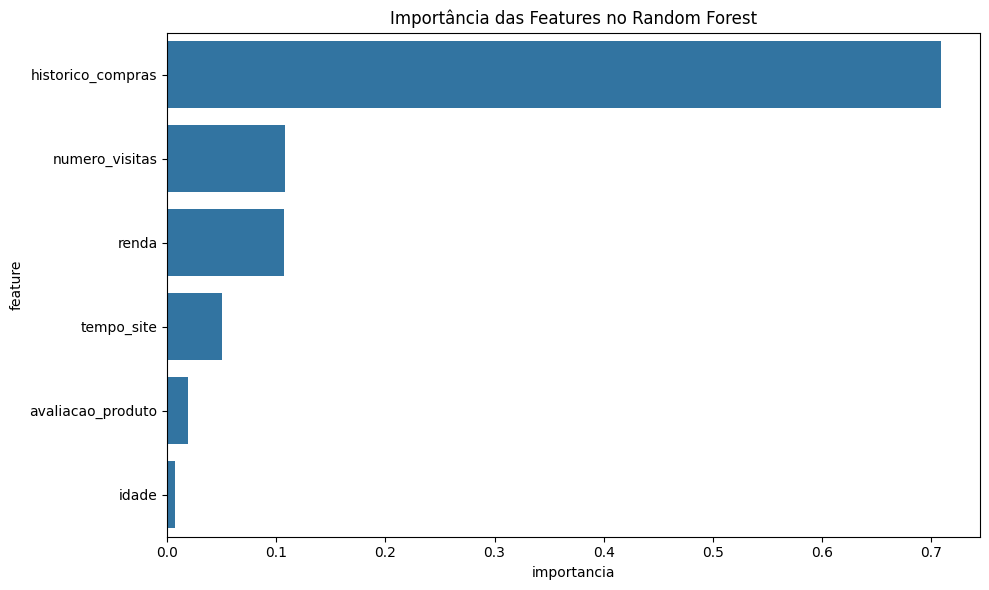

In [5]:

# Visualizando a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=importancias)
plt.title('Importância das Features no Random Forest')
plt.tight_layout()
plt.show()

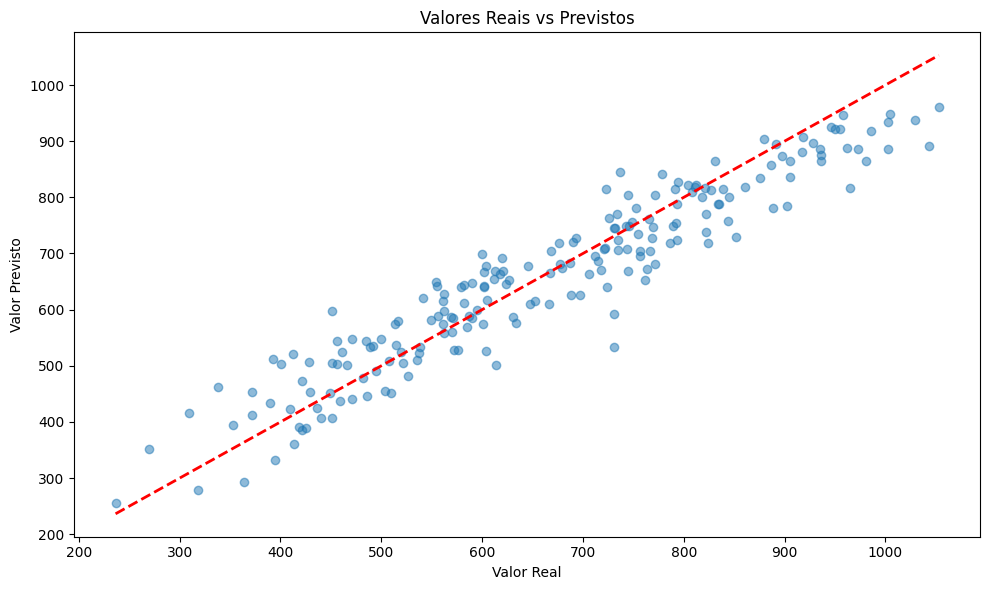

In [6]:

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valores Reais vs Previstos')
plt.tight_layout()
plt.show()

In [8]:

# Exemplo de como usar o modelo para fazer previsões
print("\nExemplos de previsões:")
exemplos = pd.DataFrame({
    'idade': [25, 45, 35],
    'renda': [5000, 15000, 8000],
    'tempo_site': [15, 45, 25],
    'numero_visitas': [5, 15, 8],
    'avaliacao_produto': [3, 5, 4],
    'historico_compras': [2, 7, 4]
})

previsoes = rf_reg.predict(exemplos)
print("\nPrevisões de valor de compra para os exemplos:")
for i, previsao in enumerate(previsoes):
    print(f"Cliente {i+1}: R${previsao:.2f}")


Exemplos de previsões:

Previsões de valor de compra para os exemplos:
Cliente 1: R$397.57
Cliente 2: R$899.28
Cliente 3: R$564.01


In [10]:

# Comparando com uma única árvore de decisão
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

print("\nComparação com Árvore de Decisão única:")
print("R² Score Random Forest:", r2_score(y_test, y_pred))
print("R² Score Árvore de Decisão:", r2_score(y_test, dt_pred))
print("\nRMSE Random Forest:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE Árvore de Decisão:", np.sqrt(mean_squared_error(y_test, dt_pred)))

# Análise de sensibilidade - como o número de árvores afeta o desempenho
n_estimators_range = [10, 50, 100, 200, 300]
r2_scores = []
rmse_scores = []

for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=10,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))



Comparação com Árvore de Decisão única:
R² Score Random Forest: 0.8955644834153951
R² Score Árvore de Decisão: 0.8356674814984683

RMSE Random Forest: 58.18076206103906
RMSE Árvore de Decisão: 72.98221690339437


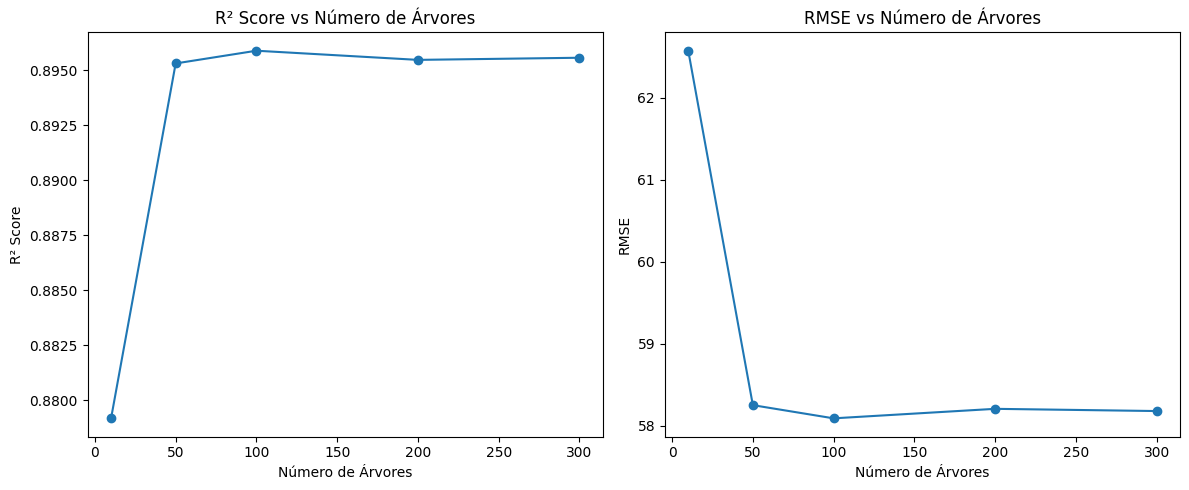

In [11]:

# Plotando os resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, r2_scores, 'o-')
plt.xlabel('Número de Árvores')
plt.ylabel('R² Score')
plt.title('R² Score vs Número de Árvores')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, rmse_scores, 'o-')
plt.xlabel('Número de Árvores')
plt.ylabel('RMSE')
plt.title('RMSE vs Número de Árvores')

plt.tight_layout()
plt.show() 